# ML Course 1 - Practice (subject)

## Import libraries

Better to do it before any further work.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Original data set

<center> <img src="titanic.png" width=400/> </center>


*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

You can have a quick view on the original data set, but keep in mind that you will not have to work on this exact version today.

In [5]:
dataset = pd.read_csv('Titanic.csv')

In [9]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck,Child,Mother
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,NaN,Adult,Not Mother
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C,Adult,Not Mother
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,NaN,Adult,Not Mother
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C,Adult,Not Mother
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,NaN,Adult,Not Mother


## Simplified data set

To start will a more simple date set, we provide a simplified version of the Titanic data set with only the following variables:

| Variable | Definition | Key |
|---|---|---|
| Embarked | Port of Embarkation | 0 = Cherbourg, 1 = Queenstown, 2 = Southampton |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Fare | Passenger fare |  |
| Sex | Sex | 0 = male, 1 = female |
| Age | Age in years |  |
| Survived | Survival | 0 = No, 1 = Yes |

In [6]:
dataset = pd.read_csv('titanic_simplified.csv')

In [7]:
dataset.head()

,Embarked,Pclass,Fare,Sex,Age,Survived
0,2,3,7.2500,0,22.0,0
1,0,1,71.2833,1,38.0,1
2,2,3,7.9250,1,26.0,1
3,2,1,53.1000,1,35.0,1
4,2,3,8.0500,0,35.0,0


Your mission is to explore the data set and extract some information to answer this open question:
**“What sorts of passengers were more likely to survive?”**  

**_Note:_ Your graphs should formatted so they are easily readable. It is expected that you provide a title and axis labels, as well as a legend when necessary.** 

## Part 1: General information 
Using Pandas tools, display the following pieces of information:

### a) What is the number of passengers?

In [12]:
num= dataset.shape[0]
print("Number of passengers :", num)

Number of passengers : 891


### b) What is the mean age of the passengers?

In [13]:
mean=dataset["Age"].mean()
print("Mean age of passengers: {:.2f}".format(mean))

Mean age of passengers: 29.79


### c) How many passengers are above 70 years old?

In [14]:
count=dataset[dataset['Age']>70].shape[0]
print("Count of passengers above age 70 :",count)

Count of passengers above age 70 : 8


### d) What proportion of passengers are in each class? (1st, 2nd, 3rd)

In [15]:
total_passengers = len(dataset)

first_class_passengers = len(dataset[dataset['Pclass'] == 1])
second_class_passengers = len(dataset[dataset['Pclass'] == 2])
third_class_passengers = len(dataset[dataset['Pclass'] == 3])

proportion_first_class = first_class_passengers / total_passengers
proportion_second_class = second_class_passengers / total_passengers
proportion_third_class = third_class_passengers / total_passengers

print("Proportion of passengers in first class: {:.2f}".format(proportion_first_class))
print("Proportion of passengers in second class: {:.2f}".format(proportion_second_class))
print("Proportion of passengers in third class: {:.2f}".format(proportion_third_class))

Proportion of passengers in first class: 0.24
Proportion of passengers in second class: 0.21
Proportion of passengers in third class: 0.55


## Part 2: Your first data exploration
Using, Matplotlib, make plots that display the required information

### a) Show the relationship between fare paid by the passengers and their age 
You suspect that in general, older passengers might have paid more for their tickets than the young passengers. To verify this, plot all the data points to see if there is a trend.  
Additional instructions:
- Which type of plot is the most appropriate for this? A normal (line) plot, or scatter plot? I let you try and decide. 😄
- Don't forget to add a title and axis labels to your graph.

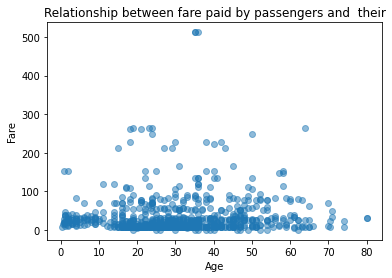

In [16]:
plt.scatter(dataset['Age'], dataset['Fare'],alpha=0.5)

plt.title('Relationship between fare paid by passengers and  their')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

📝 TEXT ANSWER: In the text cell below, write down what you conclude from the graph.

majority of the passengers paid fare below 100 irrespective of the age, from the plot it is clear that age does not make much difference in pricing.

### b) Show the age distributions of the passengers depending on the port of embarkment
Your friend told you that Queenstwon is full of retired people and you suspect that passengers who left from there are older that those who left from the two other ports. Find out by making a graph that allows you to compare the age distributions between the three ports.  
Additional instructions:
- Use a density plot.
- Your figure should have three curves, one for each port: Cherbourg, Queenstown, Southampton.
- Display the three curves on the same figure for easy comparison.
- If you make your plot carefully, your legend should indicate the name of the port that corresponds to each curve.
- Don't forget to add a title and axis labels to your graph.

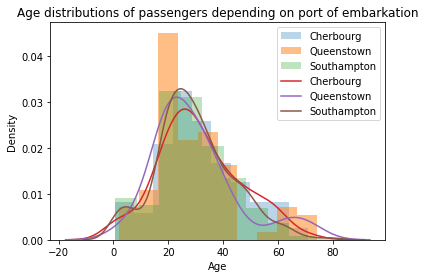

In [18]:
import seaborn as sns
ages_c = dataset.loc[dataset['Embarked'] == 0, 'Age']
ages_q = dataset.loc[dataset['Embarked'] == 1, 'Age']
ages_s = dataset.loc[dataset['Embarked'] == 2, 'Age']

plt.hist(ages_c, density=True, alpha=0.3, label='Cherbourg')
plt.hist(ages_q, density=True, alpha=0.5, label='Queenstown')
plt.hist(ages_s, density=True, alpha=0.3, label='Southampton')

# Set the title and axis labels
sns.kdeplot(ages_c, label='Cherbourg')
sns.kdeplot(ages_q, label='Queenstown')
sns.kdeplot(ages_s, label='Southampton')

# Set the title and axis labels
plt.title('Age distributions of passengers depending on port of embarkation')
plt.xlabel('Age')
plt.ylabel('Density')

plt.legend()
# Show the plot
plt.show()



📝 TEXT ANSWER: In the text cell below, write down what you conclude from the graph.

from the plot we can conclude that from queenstow more young passengers between age 20 to 40 were boarded than old people  

## Part 3:  Data Exploration related with survival
Now, let's perform analyses that will help you get intutions about the factors that might have influenced survival.

### a) How is age linked to survival?
You want to know if the age of a passenger gives you any information about their probability of surviving. Make a plot that helps you find this out.

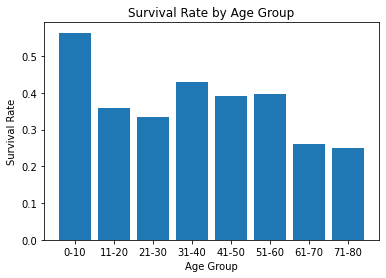

In [25]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels)

survival_rate = dataset.groupby('AgeGroup')['Survived'].mean()

plt.bar(survival_rate.index,survival_rate.values)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()

📝 TEXT ANSWER: In the text cell below, write down what you conclude from your graph.

The bar plot analyzing the survival rate by age group in the Titanic dataset reveals that childrer 0 to 10 years old had a higher chances of surviving the disaster, while elderly passengers above 70 years old had a lower chance of survival. 

Passengers in their 20s had a comparatively lower survival rate, and there was a declining trend in survival rate with increasing age beyond 30 years. 

Age is a significant factor in determining survival chances, with children having better survival rates compared to other age groups, while the elderly were at a disadvantage.

### b) Were men or women more likely to die?  
Find an answer to this question in any way you like.

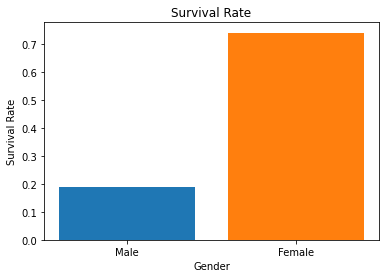

In [8]:
male = dataset[dataset['Sex'] == 0]
female = dataset[dataset['Sex'] == 1]


male_survival_rate = male['Survived'].mean()
female_survival_rate = female['Survived'].mean()

plt.bar('Male', male_survival_rate)
plt.bar('Female', female_survival_rate)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate')
plt.show()

📝 TEXT ANSWER: In the text cell below, interpret your plot or your statistics and answer the question with the information you displayed.

In [ ]:
The bar plots reveal that men are more likely to die in the disaster than women.

## Interpretation
If you saw the movie _Titanic_, you probably remember that when they board the lifeboats, they say "Children and women first!". Does the data seem to confirm that they prioritized the boarding this way?  
📝 TEXT ANSWER: Write your answer in the text cell below

In [ ]:
Yes, the titanic data supports the historical accounts of the "Women and children first" policy,
as women had a higher survival rate compared to men, indicating that they were likely given priority in boarding 
the lifeboats during the evacuation. Resulting in a higher proportion of female passengers surviving the Titanic sinking.